Portfolio Management
------------------------------------------------------------------------------------------------------
Task:
Using the 12 Industry Portfolio from Kenneth Fama Libary <br/>
[Link](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)

1. Download data via api
2. FF Industry Statistics: Ret, Cov, Corr
3. Monte Carlo Simulation for Portfolio Construction
4. Markowitz Portfolio Theory



### Downloading Fama French Data

In [1]:
# Libraries
import pandas_datareader.data as web  # module for reading datasets directly from the web
from pandas_datareader.famafrench import get_available_datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from numpy.linalg import inv,pinv
import matplotlib.lines as lns
from IPython.display import display, HTML
import seaborn as sns
import statsmodels.api as sm


plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 10})

C:\Users\wwzjo\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
datasets = get_available_datasets()
print('No. of datasets:{0}'.format(len(datasets)))


No. of datasets:297


In [3]:
df_12_industry = [dataset for dataset in datasets if '12' in dataset and 'Industry' in dataset]
print(df_12_industry)



['12_Industry_Portfolios', '12_Industry_Portfolios_Wout_Div', '12_Industry_Portfolios_daily']


In [4]:
df_ff = [dataset for dataset in datasets if '3' in dataset and 'Factors' in dataset]
print(df_ff)

['F-F_Research_Data_5_Factors_2x3', 'F-F_Research_Data_5_Factors_2x3_daily', 'Developed_3_Factors', 'Developed_3_Factors_Daily', 'Developed_ex_US_3_Factors', 'Developed_ex_US_3_Factors_Daily', 'Europe_3_Factors', 'Europe_3_Factors_Daily', 'Japan_3_Factors', 'Japan_3_Factors_Daily', 'Asia_Pacific_ex_Japan_3_Factors', 'Asia_Pacific_ex_Japan_3_Factors_Daily', 'North_America_3_Factors', 'North_America_3_Factors_Daily']


### Using the 12 Industry  Portfolio
 1 NoDur  Consumer Nondurables -- Food, Tobacco, Textiles, Apparel, Leather, Toys<br/>
 2 Durbl  Consumer Durables -- Cars, TVs, Furniture, Household Appliances<br/>
 3 Manuf  Manufacturing -- Machinery, Trucks, Planes, Off Furn, Paper, Com Printing<br/>
 4 Enrgy  Oil, Gas, and Coal Extraction and Products<br/>
 5 Chems  Chemicals and Allied Products<br/>
 6 BusEq  Business Equipment -- Computers, Software, and Electronic Equipment<br/>
 7 Telcm  Telephone and Television Transmission<br/>
 8 Utils  Utilities<br/>
 9 Shops  Wholesale, Retail, and Some Services (Laundries, Repair Shops)<br/>
 10 Hlth   Healthcare, Medical Equipment, and Drugs<br/>
 11 Money  Finance<br/>
 12 Other  Other -- Mines, Constr, BldMt, Trans, Hotels, Bus Serv, Entertainment<br/>

In [5]:
dt_start = '2009-01-01'
dt_end = '2019-12-31'

df_industry = web.DataReader(df_12_industry[0],'famafrench',start= dt_start,end=dt_end) # Taking [0] as extracting '10_Industry_Portfolios'
df_ff5f = web.DataReader(df_ff[0],'famafrench',start= dt_start,end= dt_end) # Download Fama French


In [6]:
print(df_industry['DESCR'])

12 Industry Portfolios
----------------------

This file was created by CMPT_IND_RETS using the 202004 CRSP database. It contains value- and equal-weighted returns for 12 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2020 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (132 rows x 12 cols)
  1 : Average Equal Weighted Returns -- Monthly (132 rows x 12 cols)
  2 : Average Value Weighted Returns -- Annual (11 rows x 12 cols)
  3 : Average Equal Weighted Returns -- Annual (11 rows x 12 cols)
  4 : Number of Firms in Portfolios (132 rows x 12 cols)
  5 : Average Firm Size (132 rows x 12 cols)
  6 : Sum of BE / Sum of ME (11 rows x 12 cols)
  7 : Value-Weighted Average of BE/ME (11 rows x 12 cols)


In [7]:
print(df_ff5f['DESCR'])

F-F Research Data 5 Factors 2x3
-------------------------------

This file was created by CMPT_ME_BEME_OP_INV_RETS using the 202004 CRSP database. The 1-month TBill return is from Ibbotson and Associates Inc.

  0 : (132 rows x 6 cols)
  1 : Annual Factors: January-December (11 rows x 6 cols)


In [8]:
df_ff5f = df_ff5f[0]
df_ff5f.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2009-01,-8.12,-2.01,-11.18,0.23,-1.15,0.00
2009-02,-10.10,-1.17,-7.27,1.71,-1.12,0.01
2009-03,8.95,0.67,3.56,-2.33,-2.22,0.02
2009-04,10.19,6.71,5.53,0.28,0.14,0.01
2009-05,5.21,-2.33,-0.23,-0.98,-2.16,0.00


In [9]:
ds_12Ind = df_industry[0]
ds_12Ind.head()

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Date,,,,,,,,,,,,
2009-01,-3.63,-12.48,-9.46,-3.11,-8.84,-3.09,-10.35,-0.81,-7.62,-2.20,-20.90,-13.70
2009-02,-7.59,-12.82,-15.77,-11.95,-9.76,-4.94,-7.15,-12.65,-3.10,-9.92,-14.54,-13.04
2009-03,6.38,12.83,8.63,3.76,5.97,11.34,7.64,2.79,9.94,7.05,14.21,10.60
2009-04,4.78,42.63,21.08,5.20,11.64,12.50,10.43,2.13,9.55,-0.95,17.05,14.83
2009-05,6.76,-2.82,4.95,10.77,6.18,3.15,1.52,4.66,-0.90,6.26,9.65,4.53


In [10]:
# 10 Years-avg-returns
ds_12Ind.mean()

NoDur    1.119318
Durbl    1.467727
Manuf    1.366364
Enrgy    0.453333
Chems    1.091061
BusEq    1.635152
Telcm    1.250076
Utils    0.959318
Shops    1.385606
Hlth     1.237576
Money    1.265379
Other    1.172197
dtype: float64

In [11]:
# 10 Years-covariance matrix
ds_12Ind.cov() 

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
NoDur,11.155388,13.790954,12.639201,11.174279,10.887559,10.228088,10.737176,7.032564,9.430625,8.622866,11.685072,11.923085
Durbl,13.790954,55.512311,35.824147,25.809717,23.425018,25.914932,20.360349,8.048976,20.897299,15.084613,33.599607,30.153820
Manuf,12.639201,35.824147,30.071666,23.864205,19.642022,21.093617,17.009318,7.968729,17.075710,14.498553,26.660021,25.071040
Enrgy,11.174279,25.809717,23.864205,34.126233,16.864569,16.454388,14.813562,8.154240,13.478687,11.880647,21.667525,20.343065
Chems,10.887559,23.425018,19.642022,16.864569,16.479141,14.543378,13.136551,6.803279,12.077450,11.123528,18.004366,17.471042
BusEq,10.228088,25.914932,21.093617,16.454388,14.543378,21.578413,13.239169,5.863746,14.361612,11.898945,19.734335,18.351174
Telcm,10.737176,20.360349,17.009318,14.813562,13.136551,13.239169,16.976173,7.182601,11.736110,10.312224,16.597732,16.180577
Utils,7.032564,8.048976,7.968729,8.154240,6.803279,5.863746,7.182601,11.195158,5.177715,6.225620,5.946692,7.386308
Shops,9.430625,20.897299,17.075710,13.478687,12.077450,14.361612,11.736110,5.177715,15.125268,10.778686,16.624558,15.936911
Hlth,8.622866,15.084613,14.498553,11.880647,11.123528,11.898945,10.312224,6.225620,10.778686,15.693510,14.459593,13.437122


Text(0.5, 1, 'Correlation Matrix')

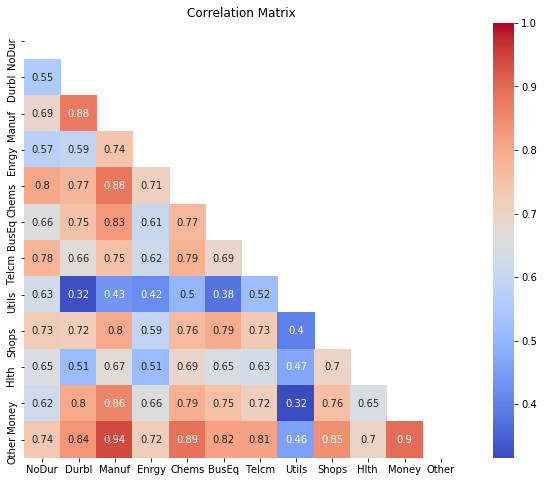

In [12]:
# Correlation
sns.heatmap(ds_12Ind.corr(), annot = True, cmap= 'coolwarm', square=True, mask=np.triu(ds_12Ind.corr()))
plt.title('Correlation Matrix', fontsize = 12)

### Monte Carlo Simulation


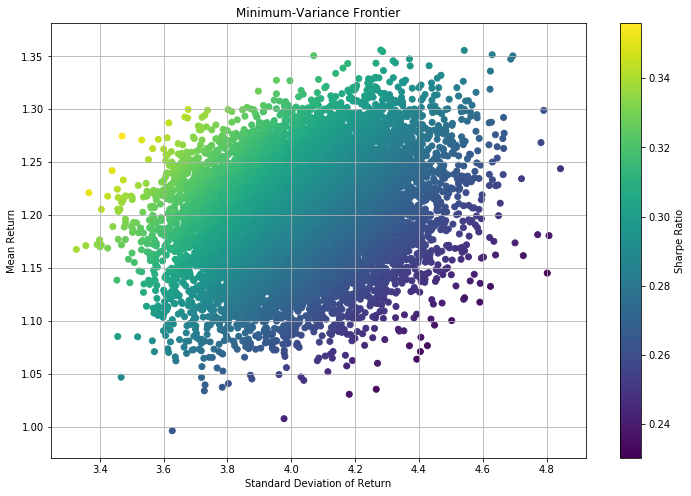

Wall time: 2.7 s


In [13]:
%%time

# mean return
Mean_Return = ds_12Ind.mean()

STD = ds_12Ind.std()
# covariance matrix
Covariance = ds_12Ind.cov()
# Risk Free rate
rf = df_ff5f['RF'].mean()


size = len(Mean_Return)
samples = 10000
pret = []
pstd = []

for i in range(samples):
    weights = np.random.random(size)
    weights = weights/(np.sum(weights))
    pret.append(np.sum(Mean_Return*weights))
    pstd.append(np.sqrt(np.dot(weights.T, (np.dot(Covariance,weights)))))

pret = np.array(pret)
pstd = np.array(pstd)

plt.scatter(pstd, pret, c=(pret-rf)/pstd ,marker='o')
plt.grid(True)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation of Return' )
plt.ylabel('Mean Return')
plt.title('Minimum-Variance Frontier')
#plt.xlim(pstd.min()-0.001,pstd.max()+0.001,0.25)
#plt.ylim(pret.min()-0.001,pret.max()+0.001,0.25)
plt.show()

### Markowitz Portfolio Theory

C:\Users\wwzjo\anaconda3\lib\site-packages\ipykernel_launcher.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Weights (%),4.25,-15.65,38.58,-36.38,11.4,43.64,25.35,38.96,59.81,6.15,18.4,-94.51


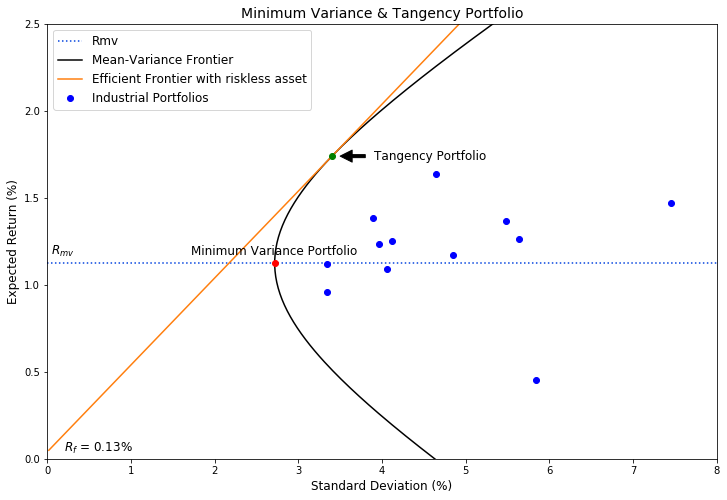

In [14]:
# Input of mean return & covariance matrix using numpy matrix
R = np.matrix(ds_12Ind.mean())
R = np.matrix(R.T) # column vector of mean returns 
V = np.matrix(ds_12Ind.cov()) # covariance matrix of returns 
rf = df_ff5f['RF'].mean() # risk-free rate

# Define e
e = np.ones((len(R),1)) # n x 1 vector of ones, column vector of ones
#SD = np.sqrt(np.diag(V)) # extract diagonal of df.cov to get the variance of all assets. To extract upper diaganol -> np.diag(x, k=1)

# Variable for Efficient frontier
delta = e.T*pinv(V)*e # eV-1e, row vector x matrix x column vector => 1 answer in matrix. pinv() -> pseudo-inverse of a matrix
alpha = R.T*pinv(V)*e # R'V-1e, row vector x matrix x column vector => 1 answer in matrix
zeta = R.T*pinv(V)*R # R'V-1R, row vector x matrix x column vector => 1 answer in matrix
D = zeta*delta-alpha**2 # denominator, 1 answer in matrix

"""
===================
EFFICIENT FRONTIER
===================
"""

# Efficient Frontier Range for Return
# Return evenly spaced values within a given interval e.g. np.arange(start,stop,step)
mu = np.arange(-max(R),max(R)*5,max(R)/100); 

# Plot Efficient Frontier
minvar = ((delta*mu**2)-2*alpha*mu+zeta)/D; # Calculate variance of return for frontier portfolio
minstd = np.sqrt(minvar)[0]; # min. std deviation
minstd = np.squeeze(np.asarray(minstd)) # np.asarray is to modify minstd, np.squeeze is to remove any 1-dimensional array


"""
==========================
MINIMUM VARIANCE PORTFOLIO
==========================
"""
# Mean and Variance of Minimum Variance Portfolio
mu_g = alpha/delta
var_g = 1/delta
std_g = np.sqrt(var_g)

# Minimum Variance Portfolio Weights
w_g = (pinv(V)*e)/delta

"""
=================
TANGENT PORTFOLIO
=================
"""
# Expected Return of Tangency Portfolio/ Risk Premium for tangency portfolio
mu_tan = (alpha*rf-zeta)/(delta*rf-alpha);
 
# Variance and Standard Deviation of Tangency Portfolio
vartan = (zeta-2*rf*alpha + (rf**2*delta))/((alpha-delta*rf)**2);
stdtan = np.sqrt(vartan);

# Weights for Tangency Portfolio
w_tan = (pinv(V)*(R - rf*e))/(alpha-delta*rf) 

# Tangency Line
m_tan = mu[mu >= rf]; 
minvar_rf = (m_tan-rf)**2/(zeta-2*rf*alpha+delta*rf**2);
minstd_rf = np.sqrt(minvar_rf);
minstd_rf = np.squeeze(np.asarray(minstd_rf))

# Axis settings
axes = plt.gca()
axes.set_xlim([0,8])
axes.set_ylim([0,2.5])
ax = plt.axes()

# Print out weights of the 10 assets from Tangency Portfolio
w_tan = w_tan.T*100
title = "Weights (%)"
opt_weights = pd.DataFrame(w_tan, index=[title], columns=ds_12Ind.columns)
display(np.round(opt_weights, decimals=2))

# Plot minimum frontier portfolio with Tangency Portfolio
ax.axhline(mu_g, color='xkcd:blue', linestyle=':')
plt.plot(minstd,mu,"k",minstd_rf,m_tan,"C1",STD, R,'bo',std_g,mu_g,'ro',stdtan,mu_tan,'go') # plot efficient frontier with tangency portfolio
plt.title('Minimum Variance & Tangency Portfolio',fontsize=14)
plt.ylabel('Expected Return (%)',fontsize=12)
plt.xlabel('Standard Deviation (%)',fontsize=12)
plt.text(0.05,0.05+mu_g,r'$R_{mv}$',fontsize=12);
plt.text(0.2,rf,r'$R_{f}$' ' = 0.13%',fontsize=12);
plt.text(-1.00+std_g, 0.05+mu_g,'Minimum Variance Portfolio',fontsize=12);
plt.text(0.5+stdtan,-0.02+mu_tan,'Tangency Portfolio',fontsize=12);
plt.grid(False)


# Putting arrow & Legend
axes.annotate('',xy=(3.5,1.74), xytext=(3.8, 1.74), arrowprops=dict(facecolor='xkcd:black',width=3,headwidth=12))
axes.legend(['Rmv','Mean-Variance Frontier', 'Efficient Frontier with riskless asset','Industrial Portfolios'], fontsize = 12)
plt.show()